In [104]:
## GRIP INTERNSHIP

In [105]:
# Data Science and Business Analytics

# Sushan Gautam

# GRIPJuly

In [106]:
# Perform Exploratory Data Analysis on 'Global Terrorism'.
# As a security/defense analyst, try to find the hot zone of terrorism.
# What all security issues and insights can you derive by EDA?

In [107]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})

In [108]:
# Load Dataset
df= pd.read_csv('globalterrorism.csv',engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [109]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [110]:
## Renaming the columns

In [111]:
df.rename(columns={'iyear':'year', 'imonth':'month','country_txt':'Country', 'region_txt':'Region','provstate':'State', 'attacktype1_txt':'AttackType','targtype1_txt':'TargetType', 'targsubtype1_txt':'TargetSubType','target1':'Target','gname':'GroupName','weaptype1_txt':'WeaponType','weapsubtype1_txt':'WeaponSubtype','nkill':'Killed','nwound':'Wounded','propcomment':'PropertyDamage'},inplace= True)

In [112]:
df= df[['year','month','Country','Region','State','city','location','success','AttackType','TargetType','TargetSubType','Target','GroupName','motive','WeaponType','WeaponSubtype','Killed','Wounded','PropertyDamage']]
df.head()

,year,month,Country,Region,State,city,location,success,AttackType,TargetType,TargetSubType,Target,GroupName,motive,WeaponType,WeaponSubtype,Killed,Wounded,PropertyDamage
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,NaN,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,NaN,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Attica,Athens,NaN,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,NaN,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN


In [113]:
df.shape

(181691, 19)

In [114]:
df.Country.value_counts()[:21]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Lebanon            2478
Name: Country, dtype: int64

Text(0.5, 1.0, 'Terrorism-Prone Countries')

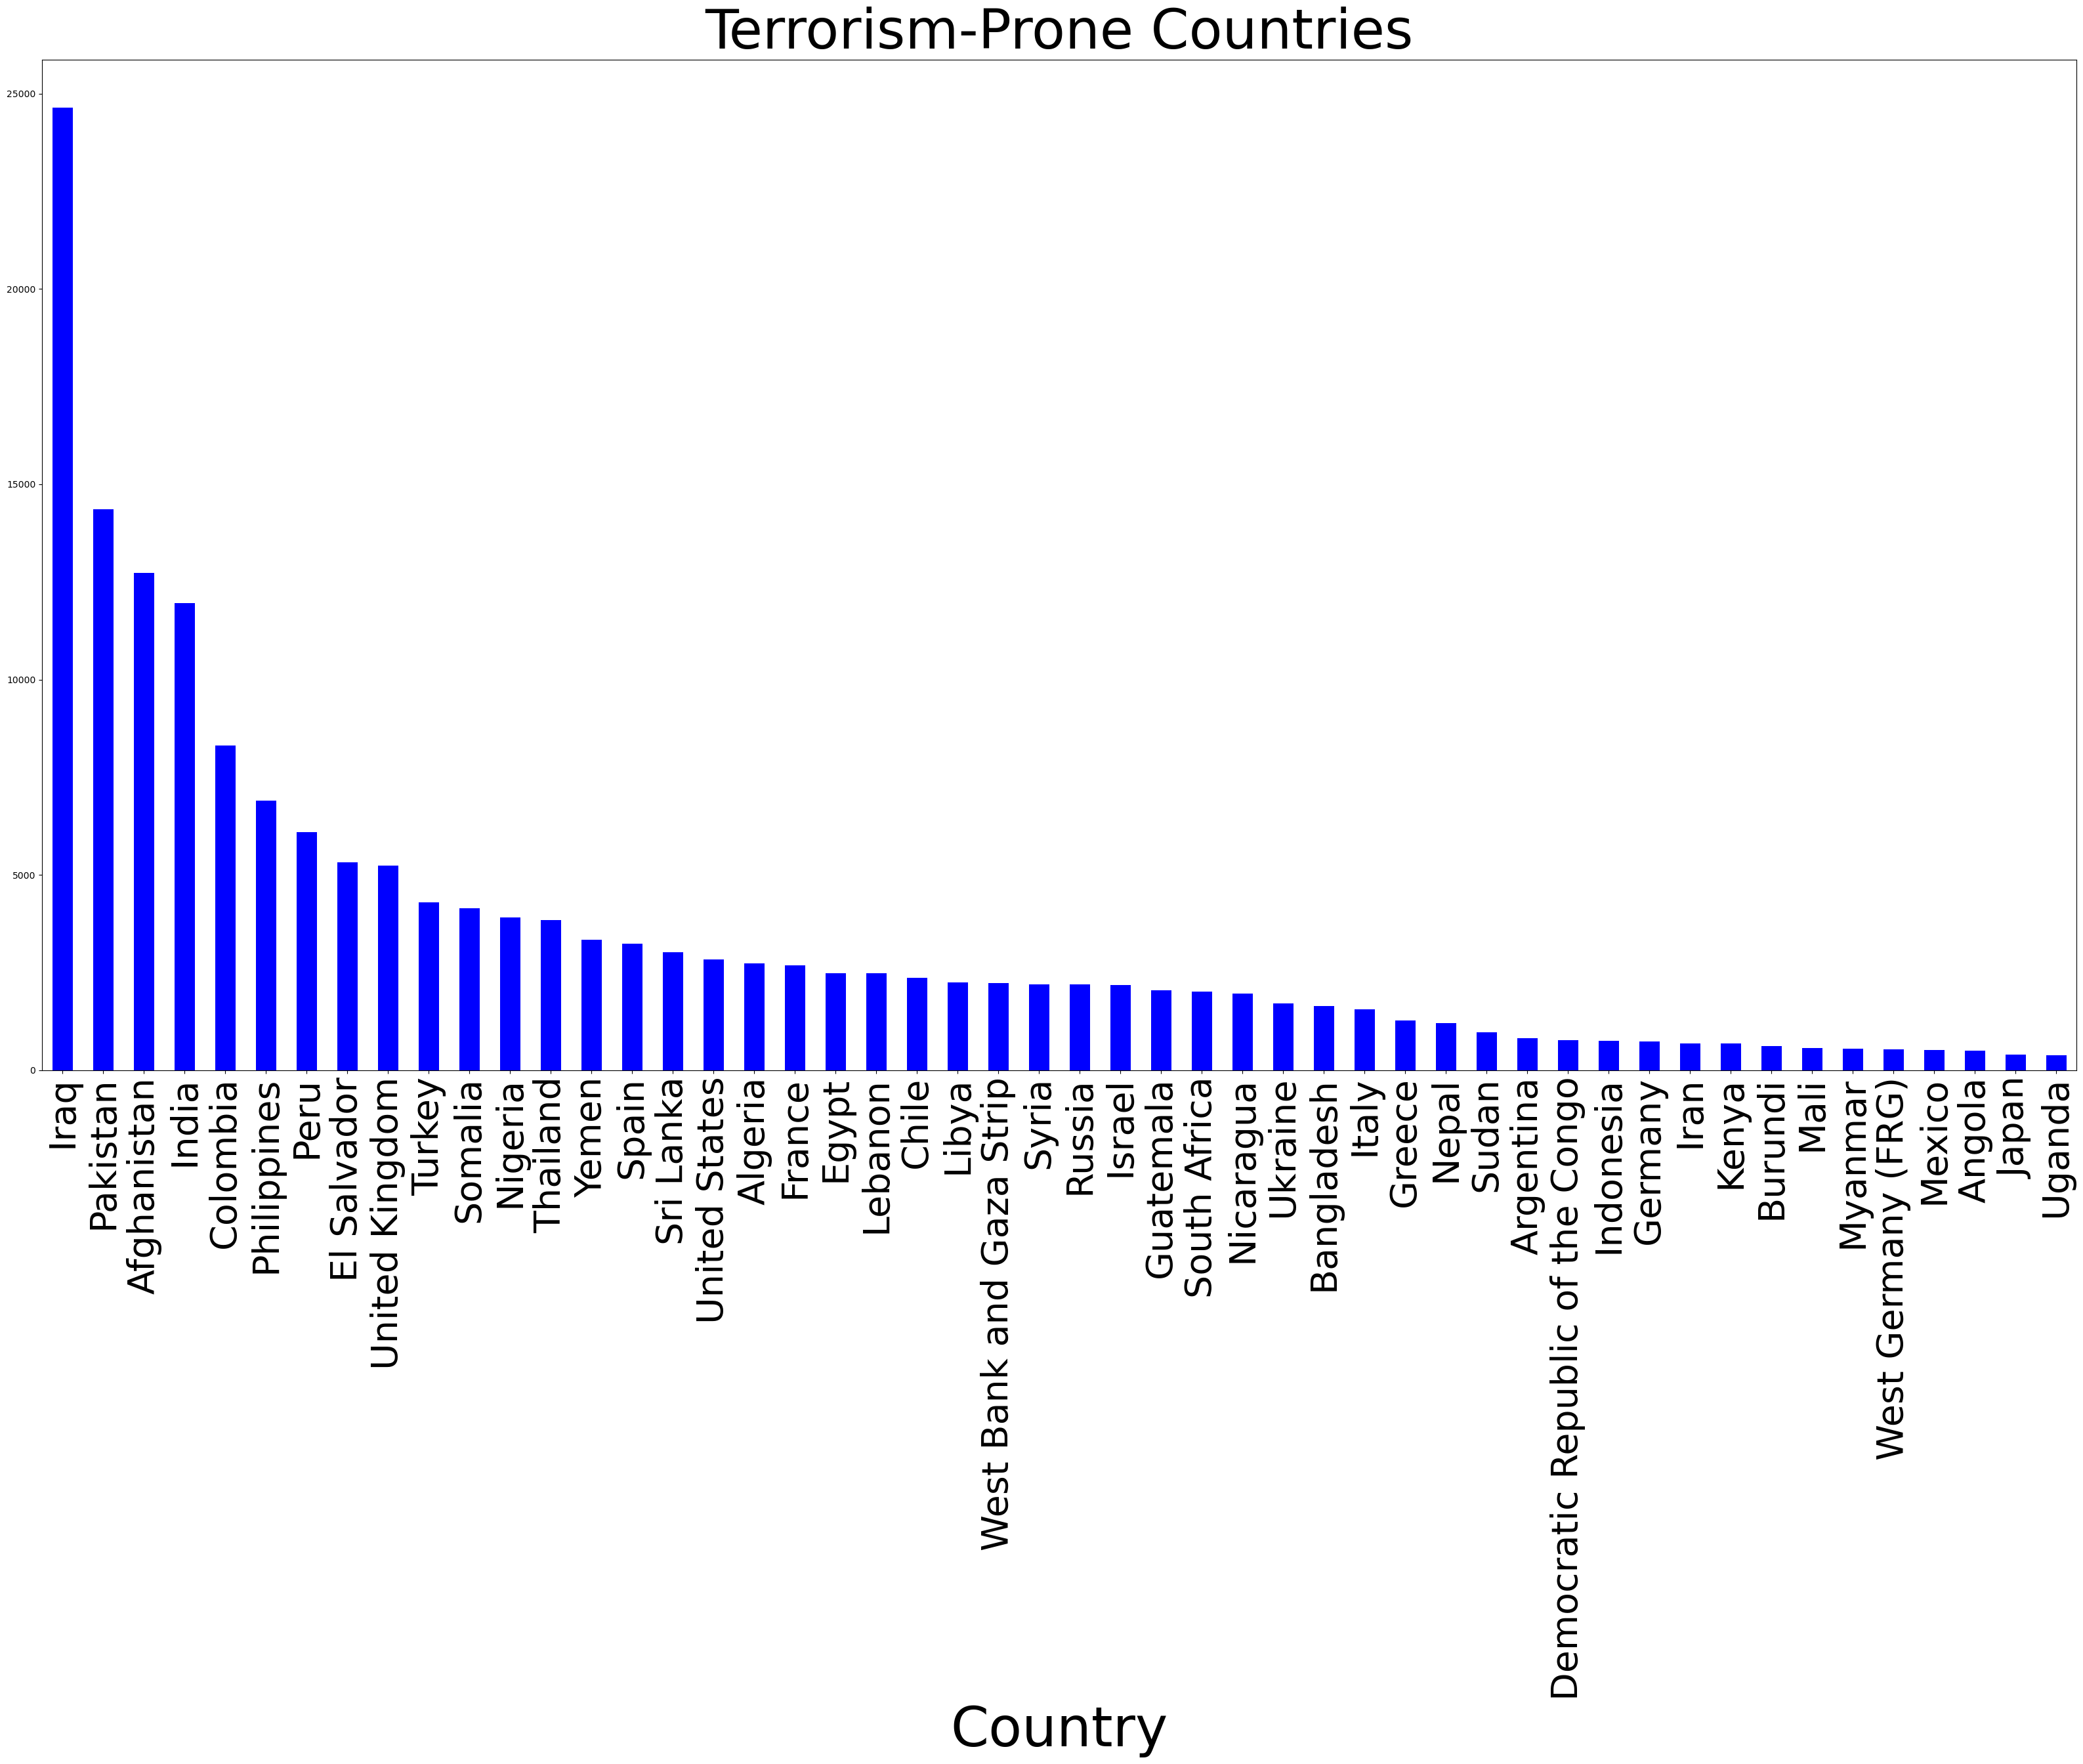

In [115]:
contry = df['Country'].value_counts()[:50]
contry.plot.bar(figsize=(40,20),color='blue')
plt.xlabel('Country', fontsize=60)
plt.xticks(fontsize=40)
plt.title('Terrorism-Prone Countries', fontsize=60)

In [116]:
df.Region.value_counts()[:21]

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0.5, 1.0, 'Top Terrorism-Prone Regions')

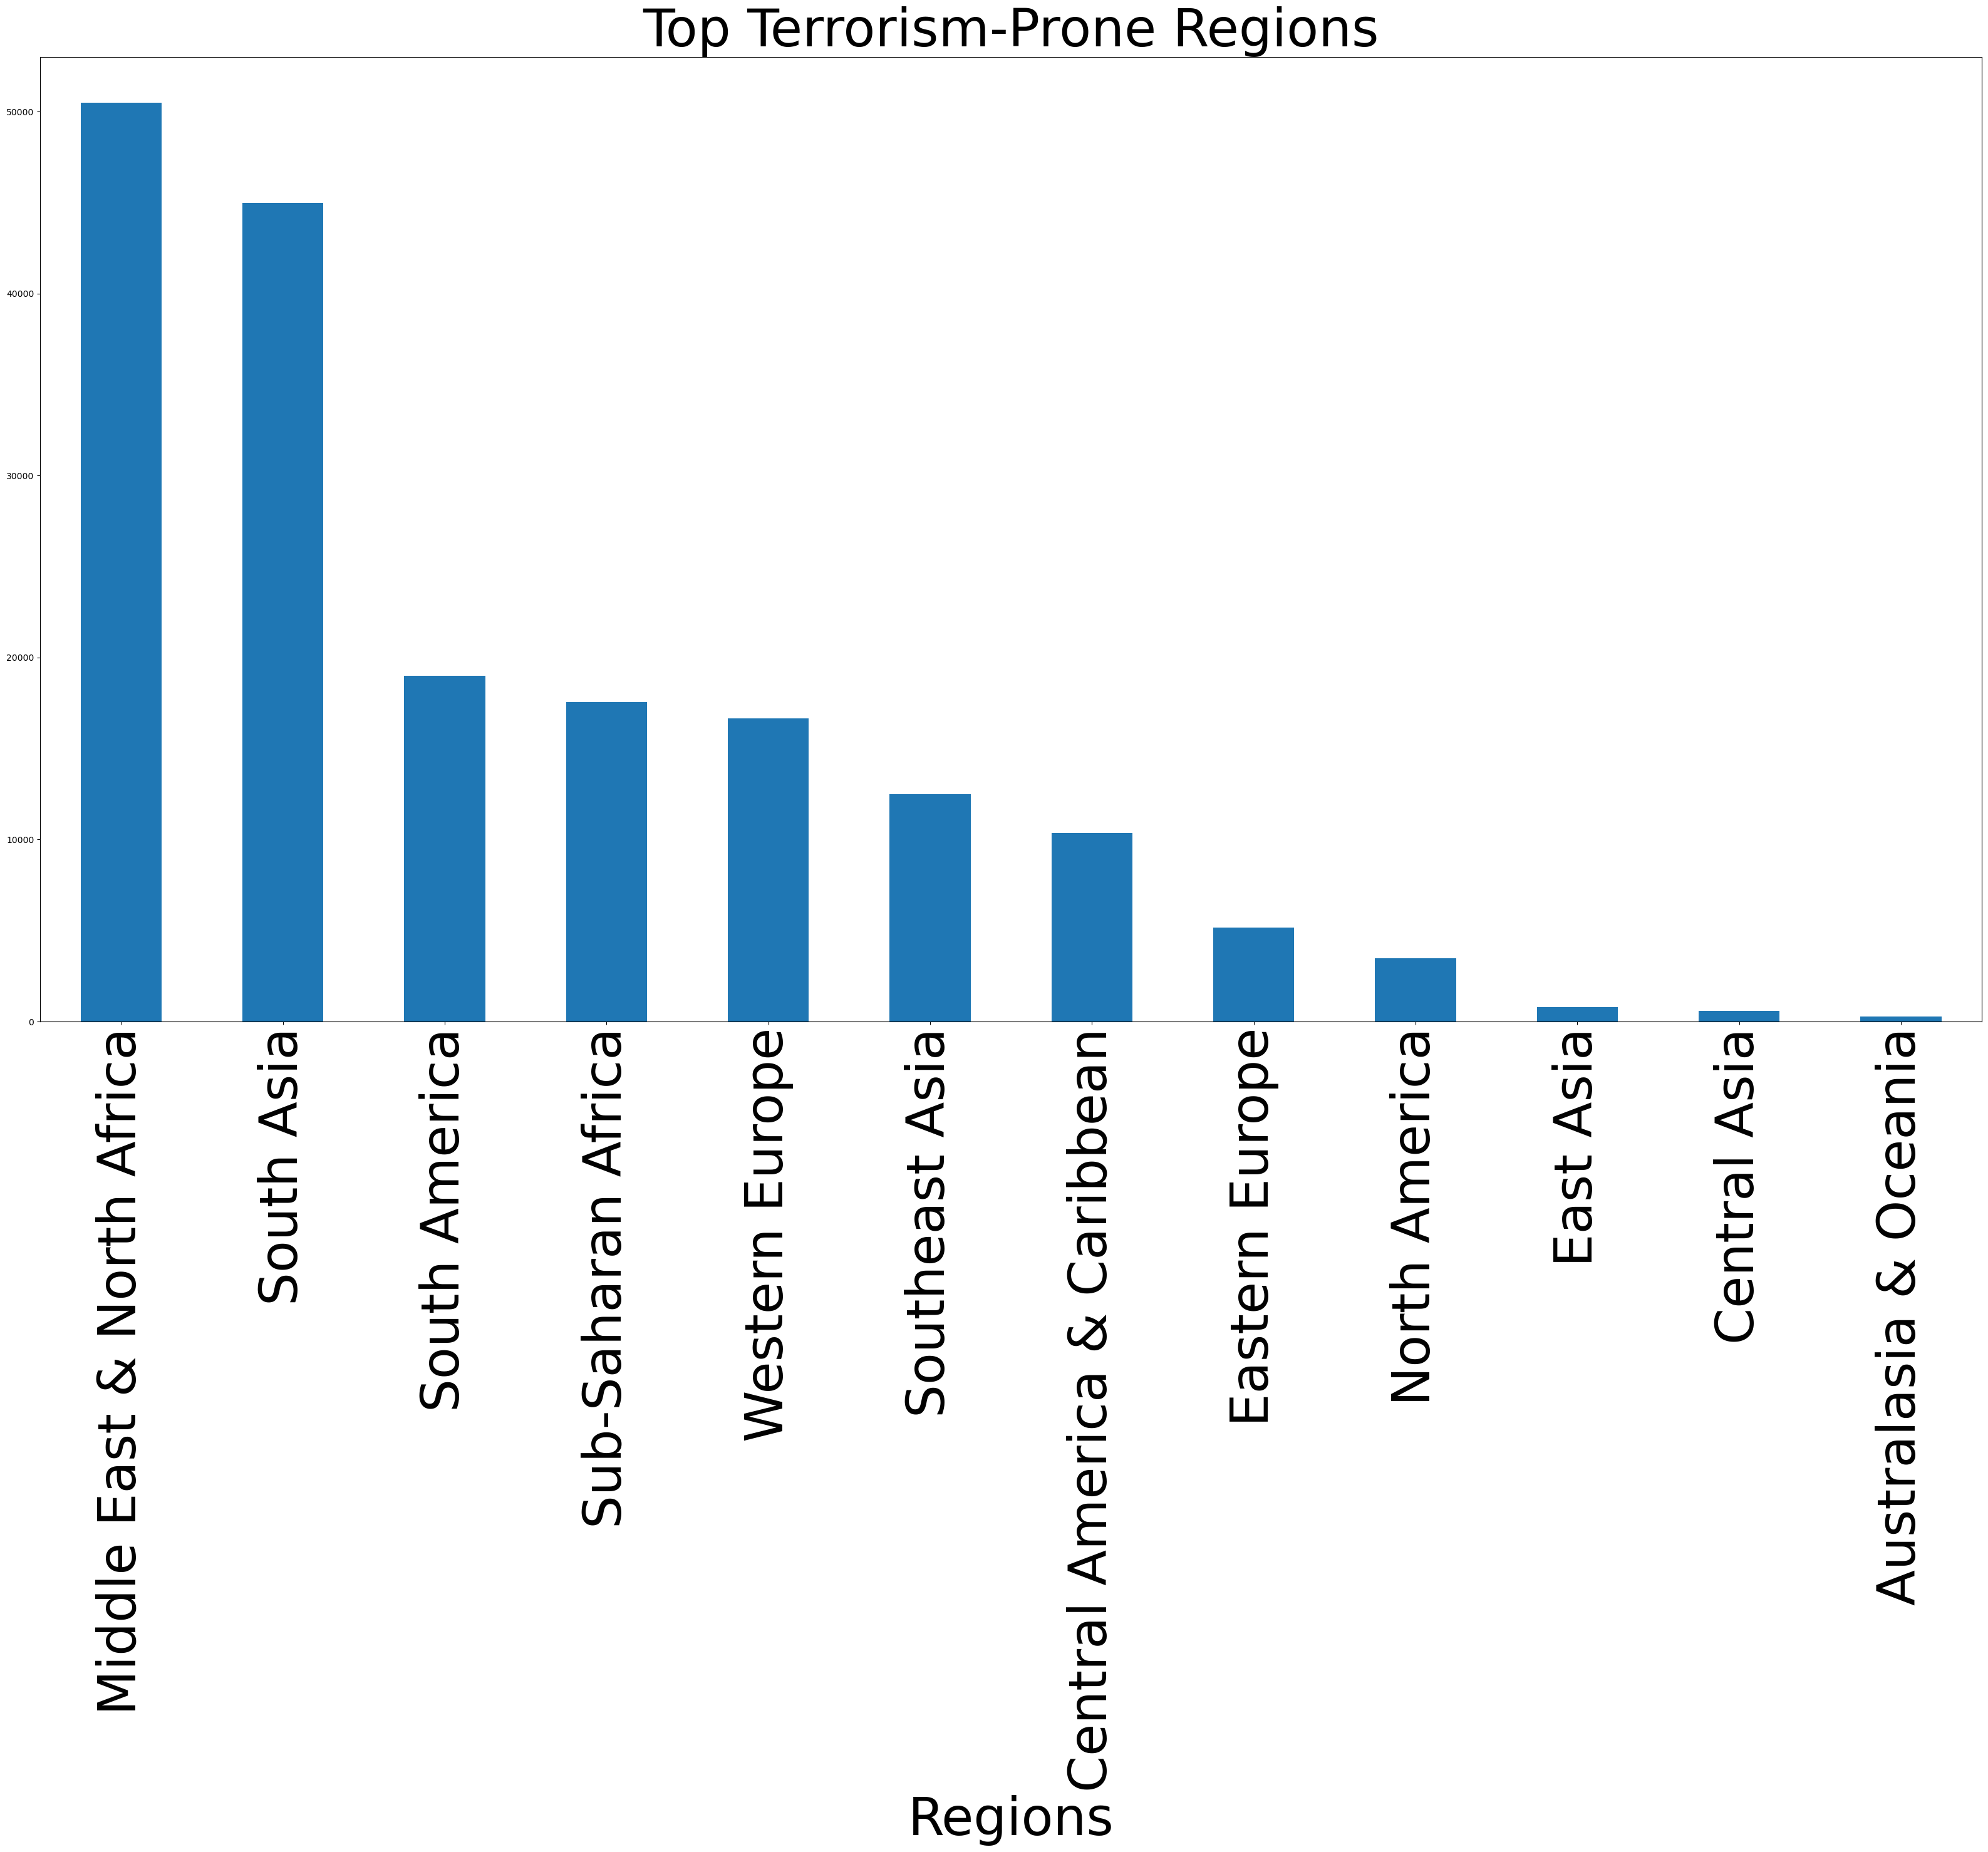

In [117]:
region = df['Region'].value_counts()
region.plot.bar(figsize=(40,20))
plt.xlabel('Regions',fontsize=60)
plt.xticks(fontsize=60)
plt.title('Top Terrorism-Prone Regions',fontsize=60)

In [118]:
df['TargetType'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargetType, dtype: int64

Text(0.5, 1.0, 'Major Targets of Terrorism')

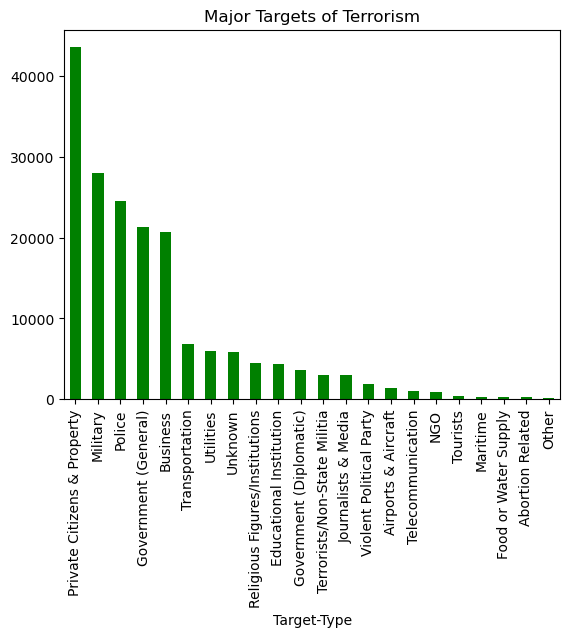

In [119]:
target = df['TargetType'].value_counts()
target.plot.bar(color='green')
plt.xlabel('Target-Type')
plt.title('Major Targets of Terrorism')

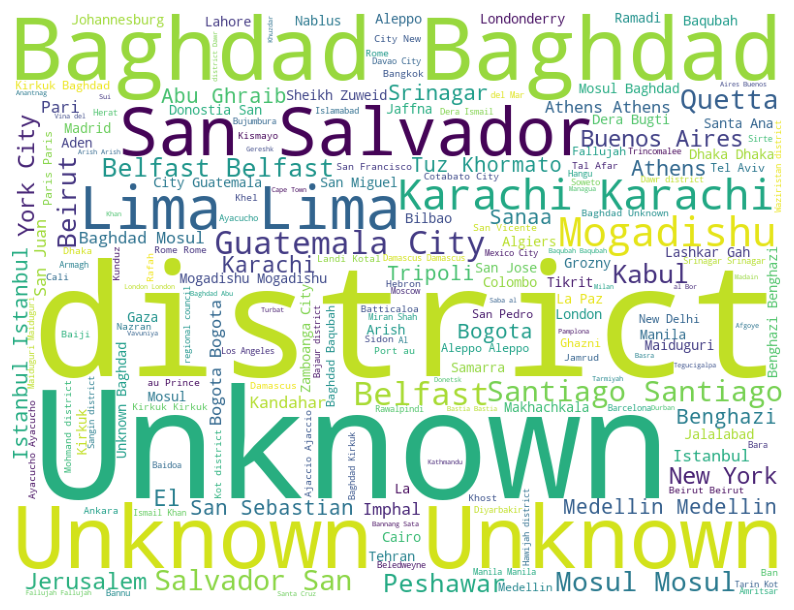

In [120]:
from wordcloud import WordCloud
from scipy import signal
cities = df.city.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white', width = 800, height = 610).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Text(0.5, 1.0, 'Region-wise terrorism over the years')

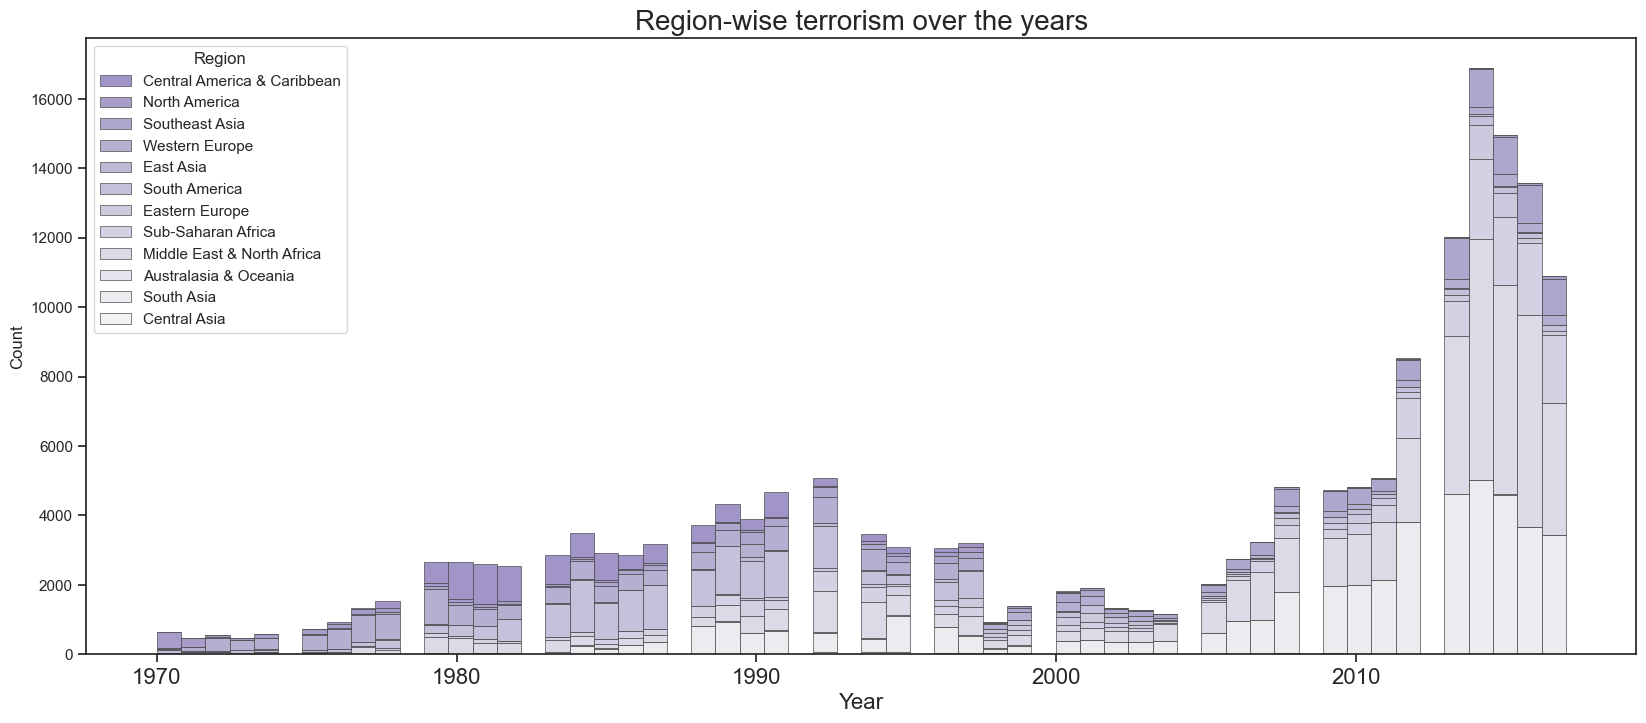

In [121]:
plt.figure(figsize=(20,8))
sns.set_theme(style="ticks")
sns.histplot(
    df,
    x="year", hue="Region",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale= False,
)
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Region-wise terrorism over the years', fontsize=20)

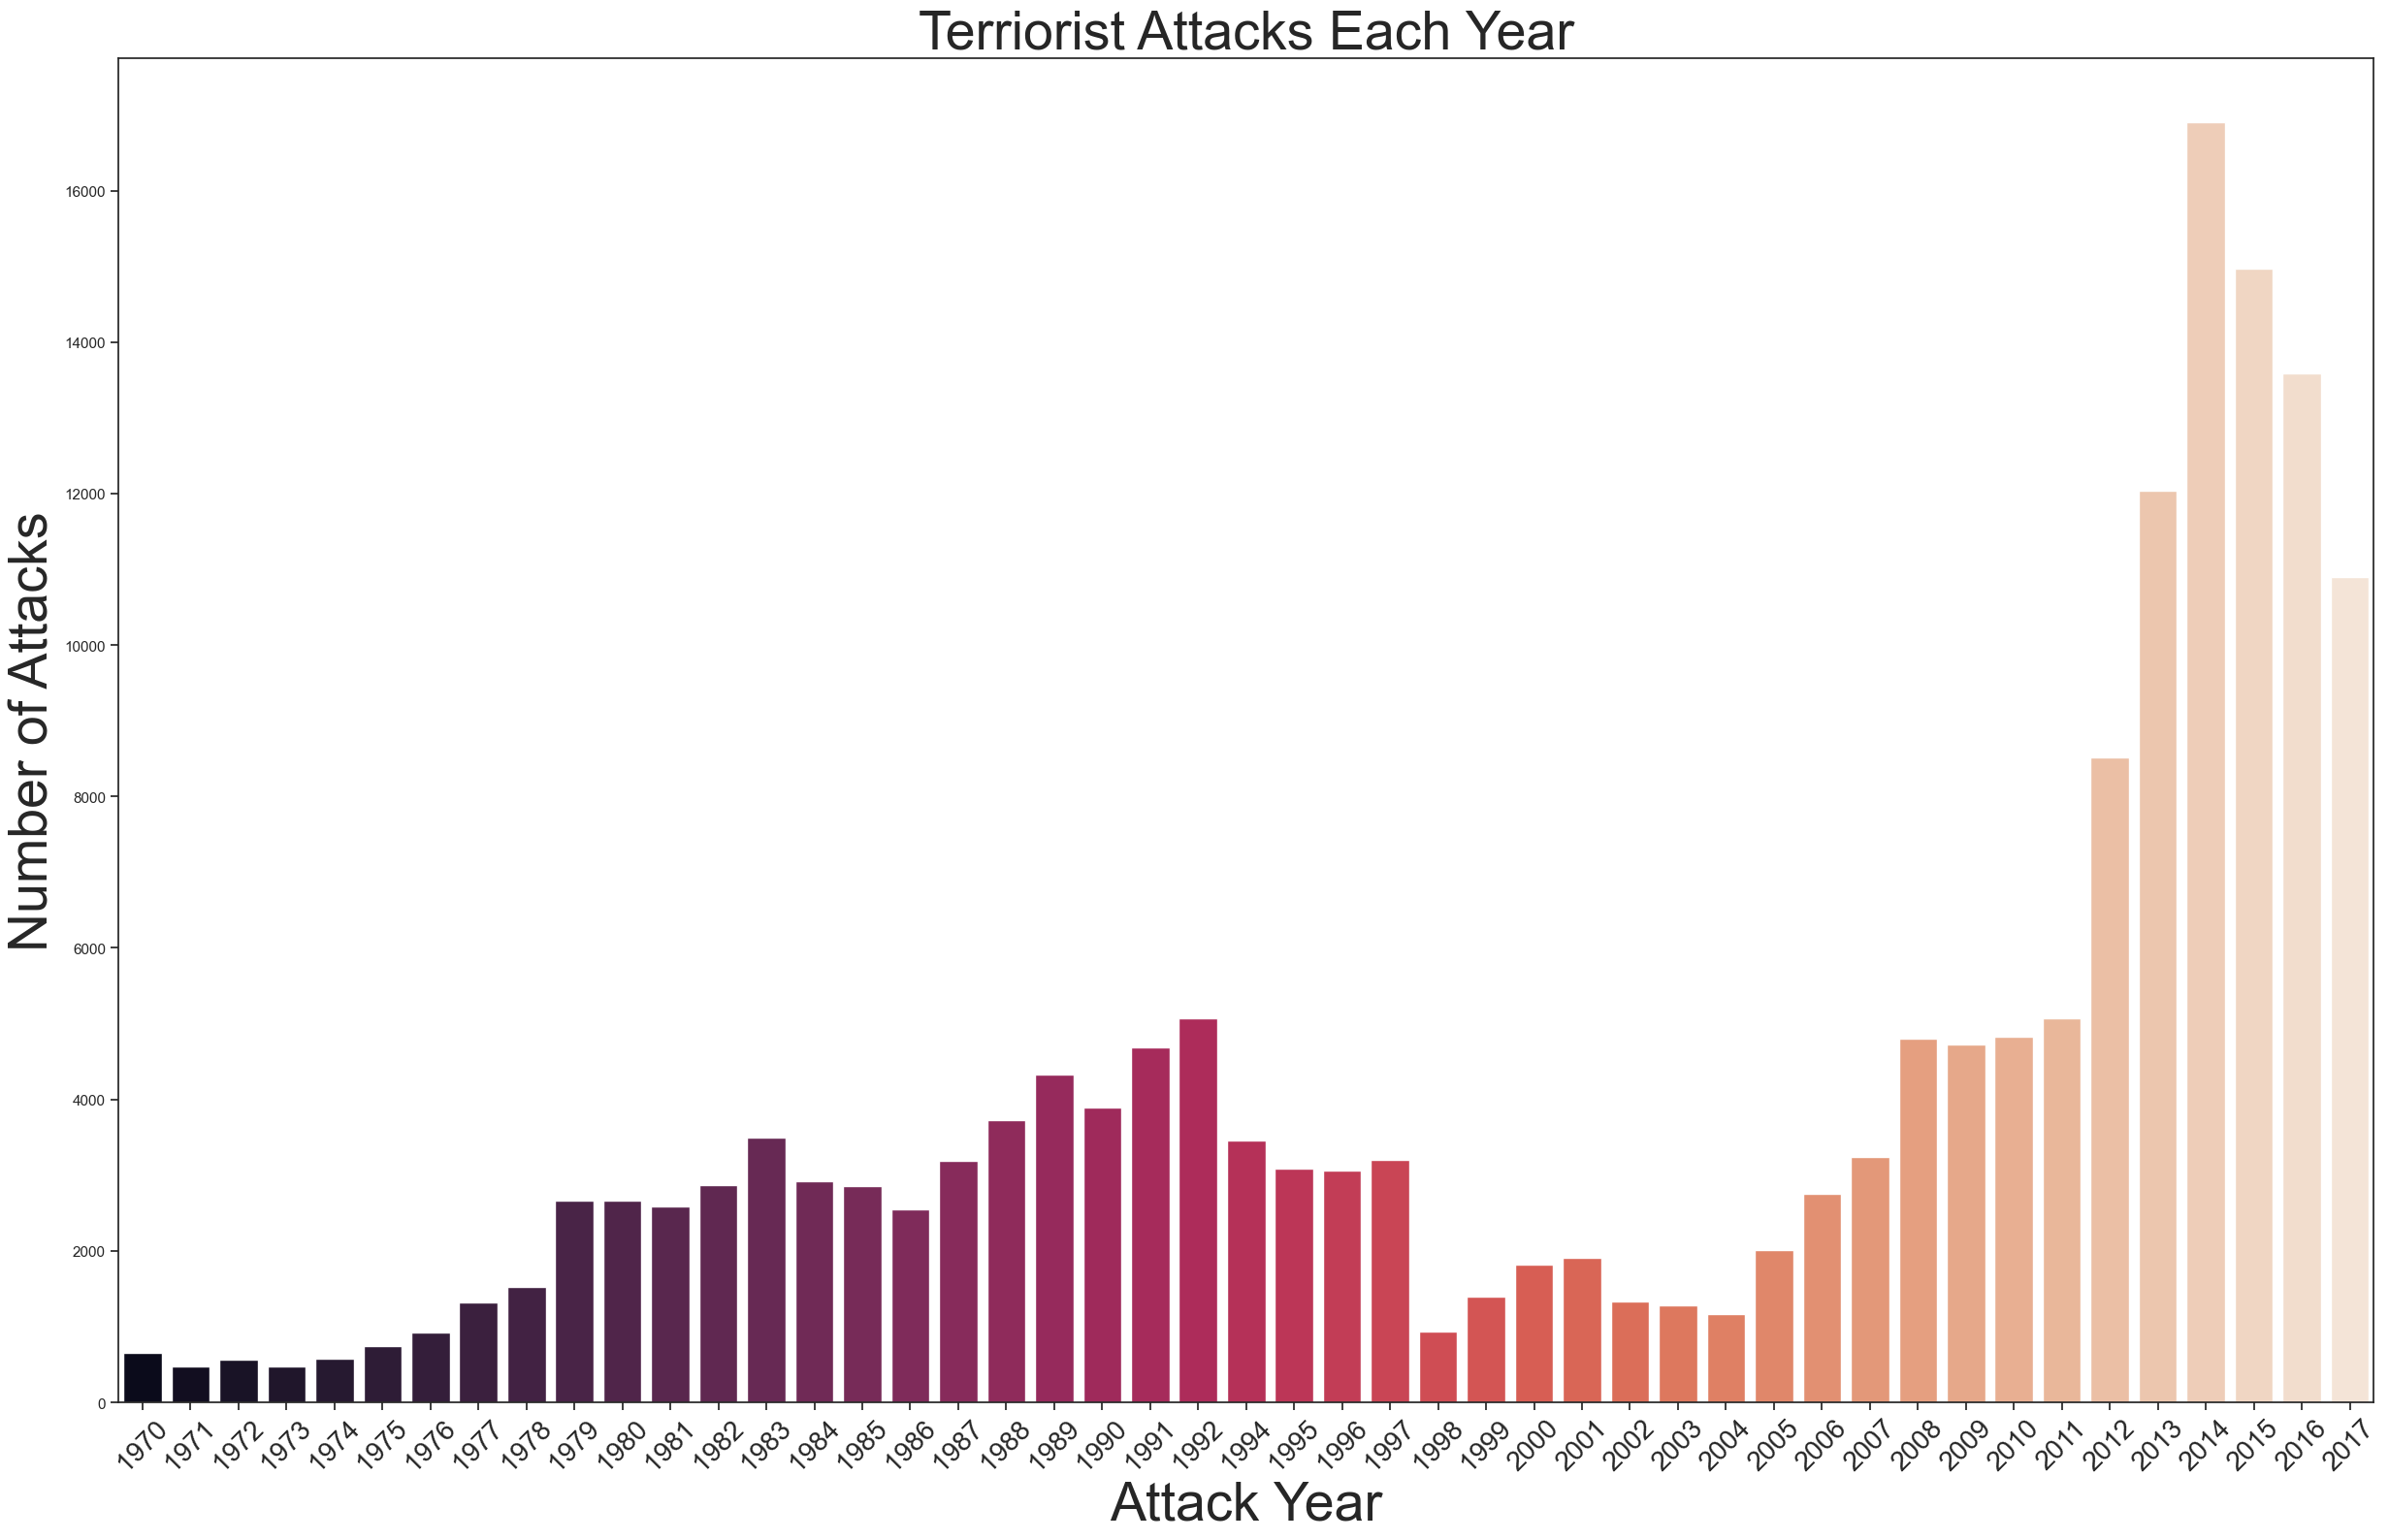

In [122]:
x_year = df['year'].unique()
y_count_years = df['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (30,18))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45, fontsize=20)
plt.xlabel('Attack Year', fontsize=40)
plt.ylabel('Number of Attacks', fontsize=40)
plt.title('Terriorist Attacks Each Year', fontsize=40)
plt.show()

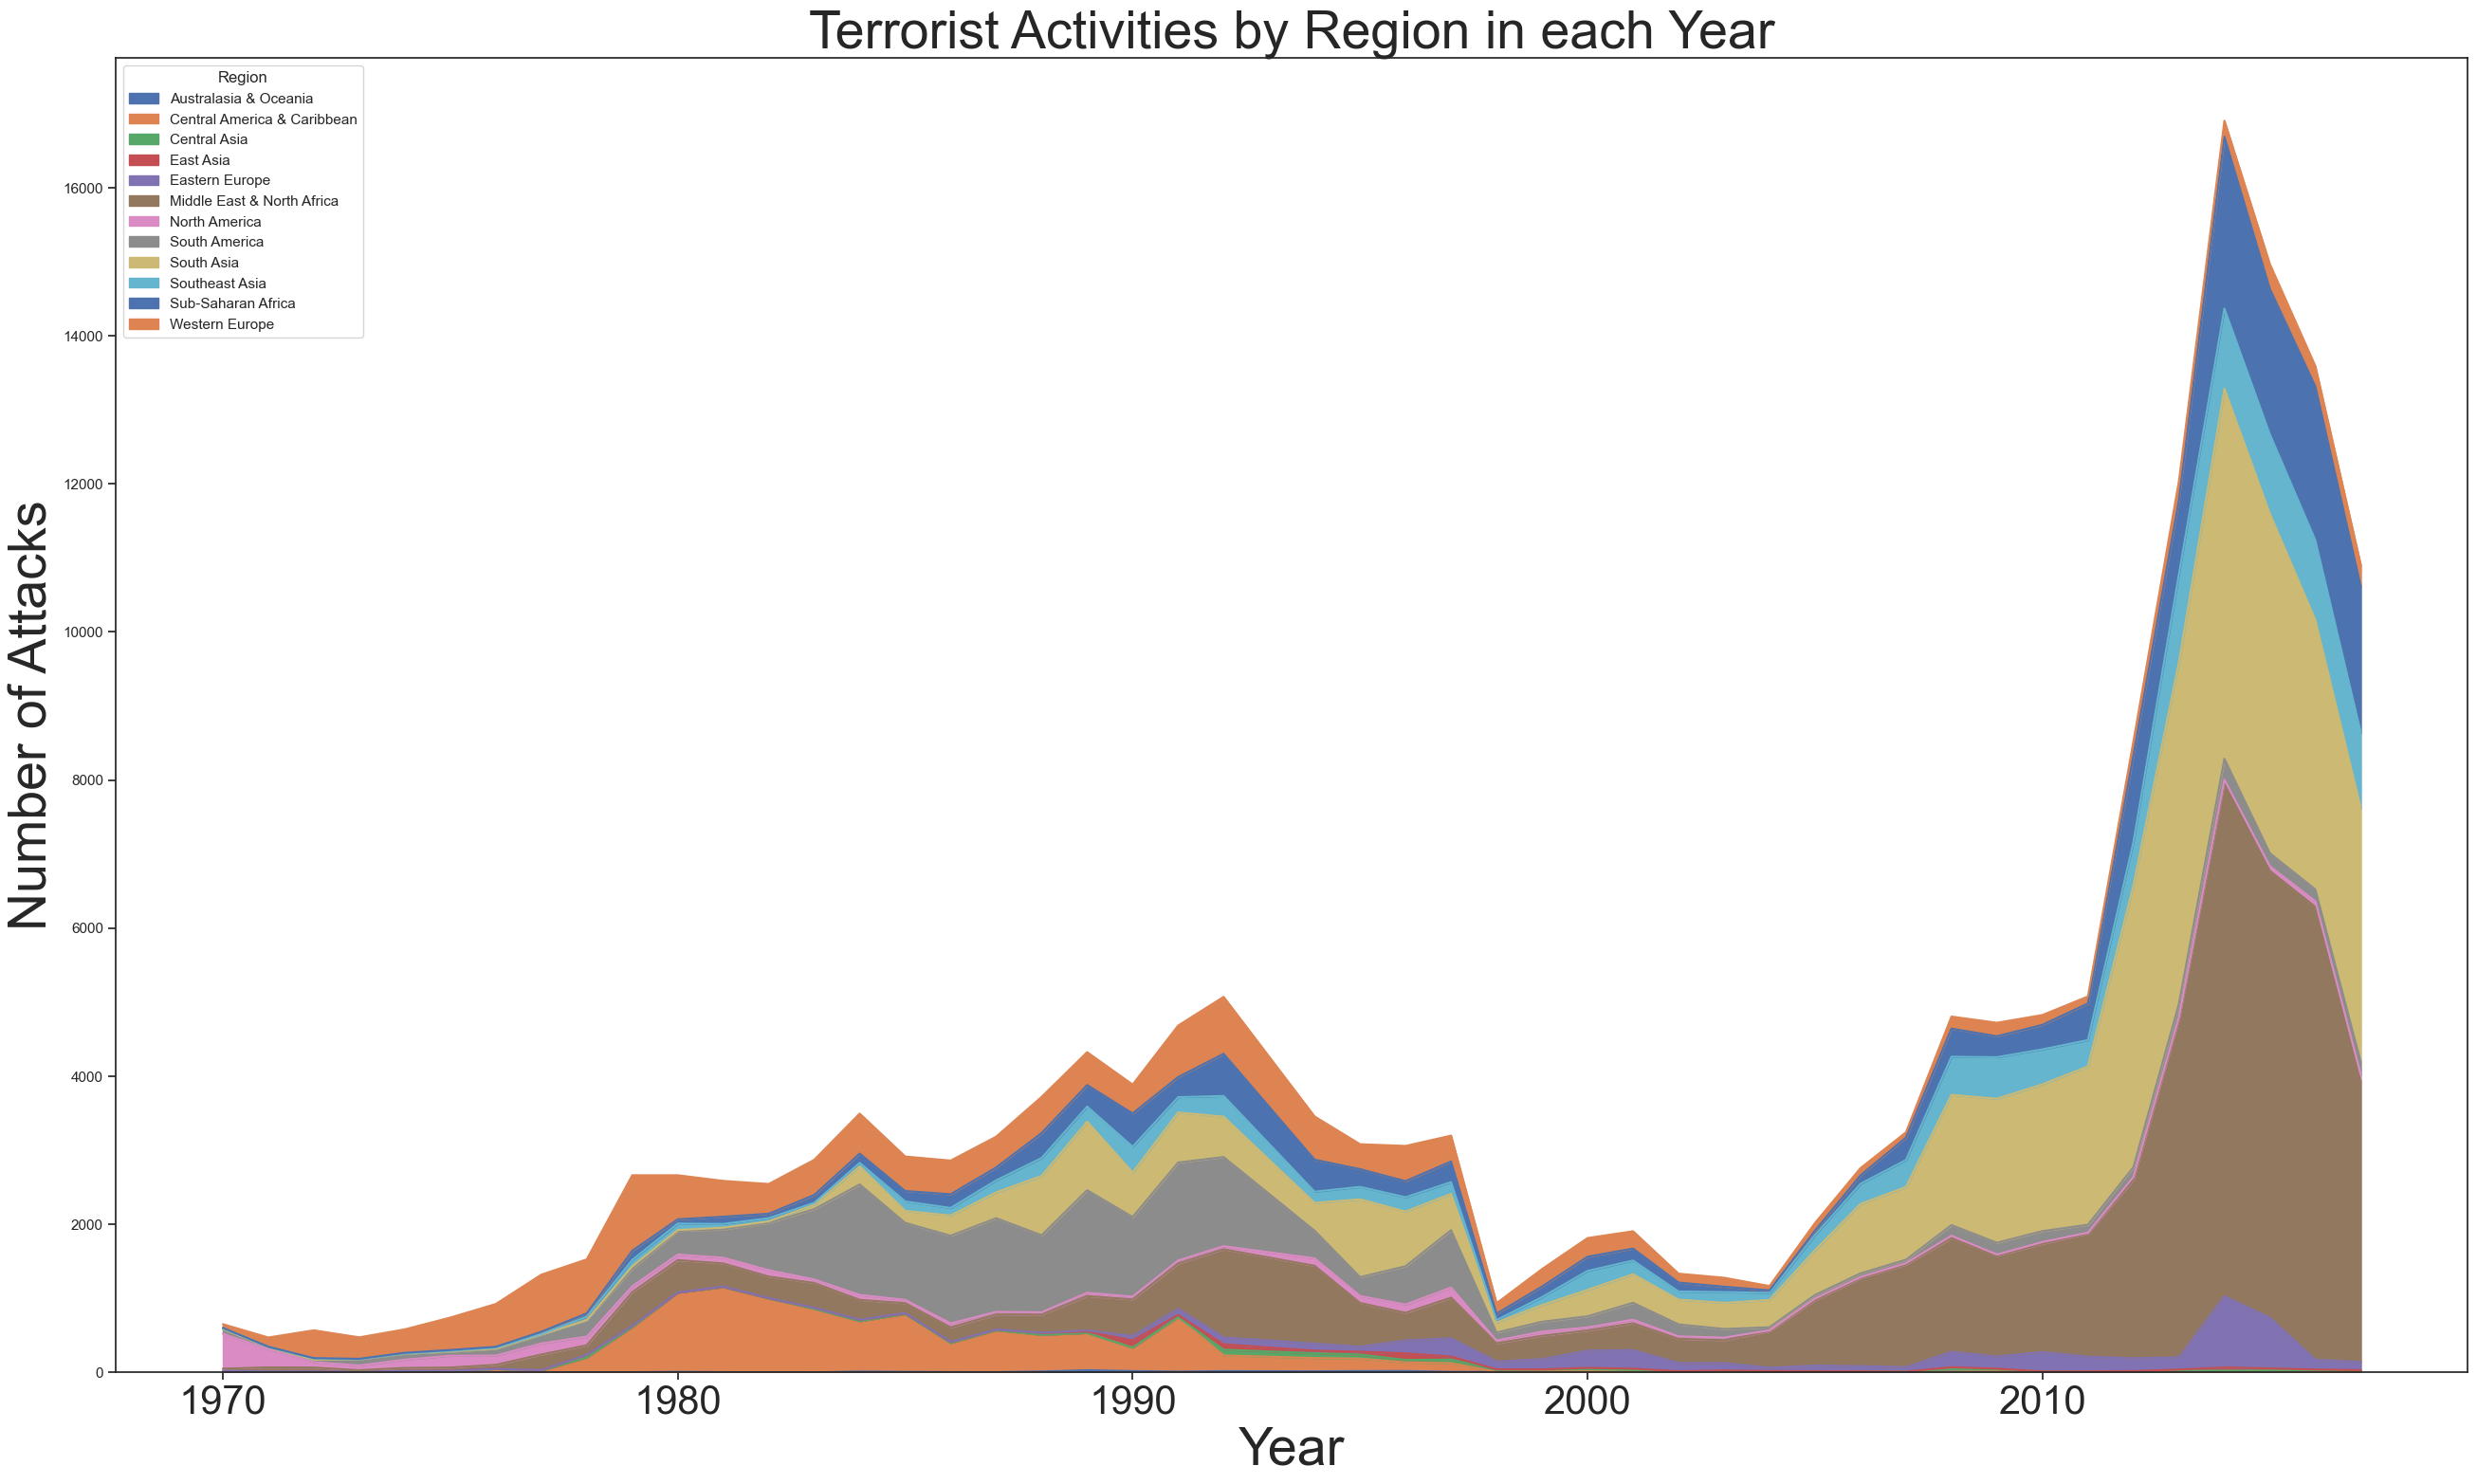

In [123]:
pd.crosstab(df.year, df.Region).plot(kind='area',figsize=(32,18))
plt.title('Terrorist Activities by Region in each Year',fontsize=40)
plt.ylabel('Number of Attacks',fontsize=40)
plt.xticks(fontsize=30)
plt.xlabel('Year',fontsize=40)
plt.show()

<ipython-input-124-b6acde33bd06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  attack=df.groupby('AttackType')['Killed','Wounded'].count()


<AxesSubplot:xlabel='AttackType'>

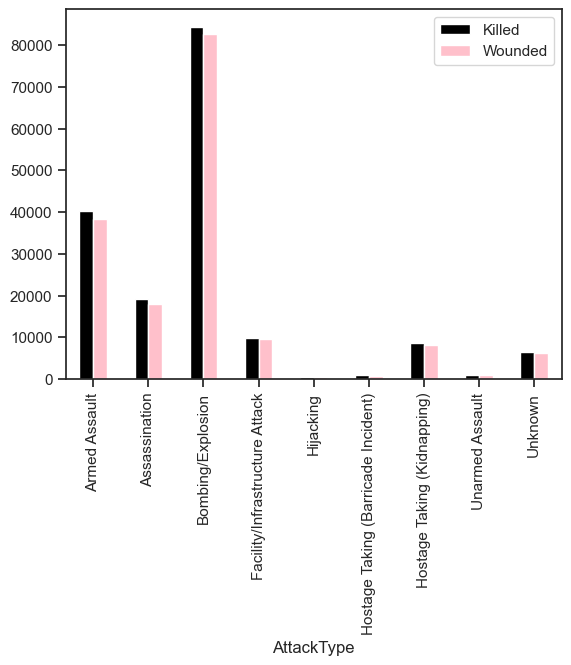

In [124]:
attack=df.groupby('AttackType')['Killed','Wounded'].count()
attack.plot.bar(color=['black','pink'])

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

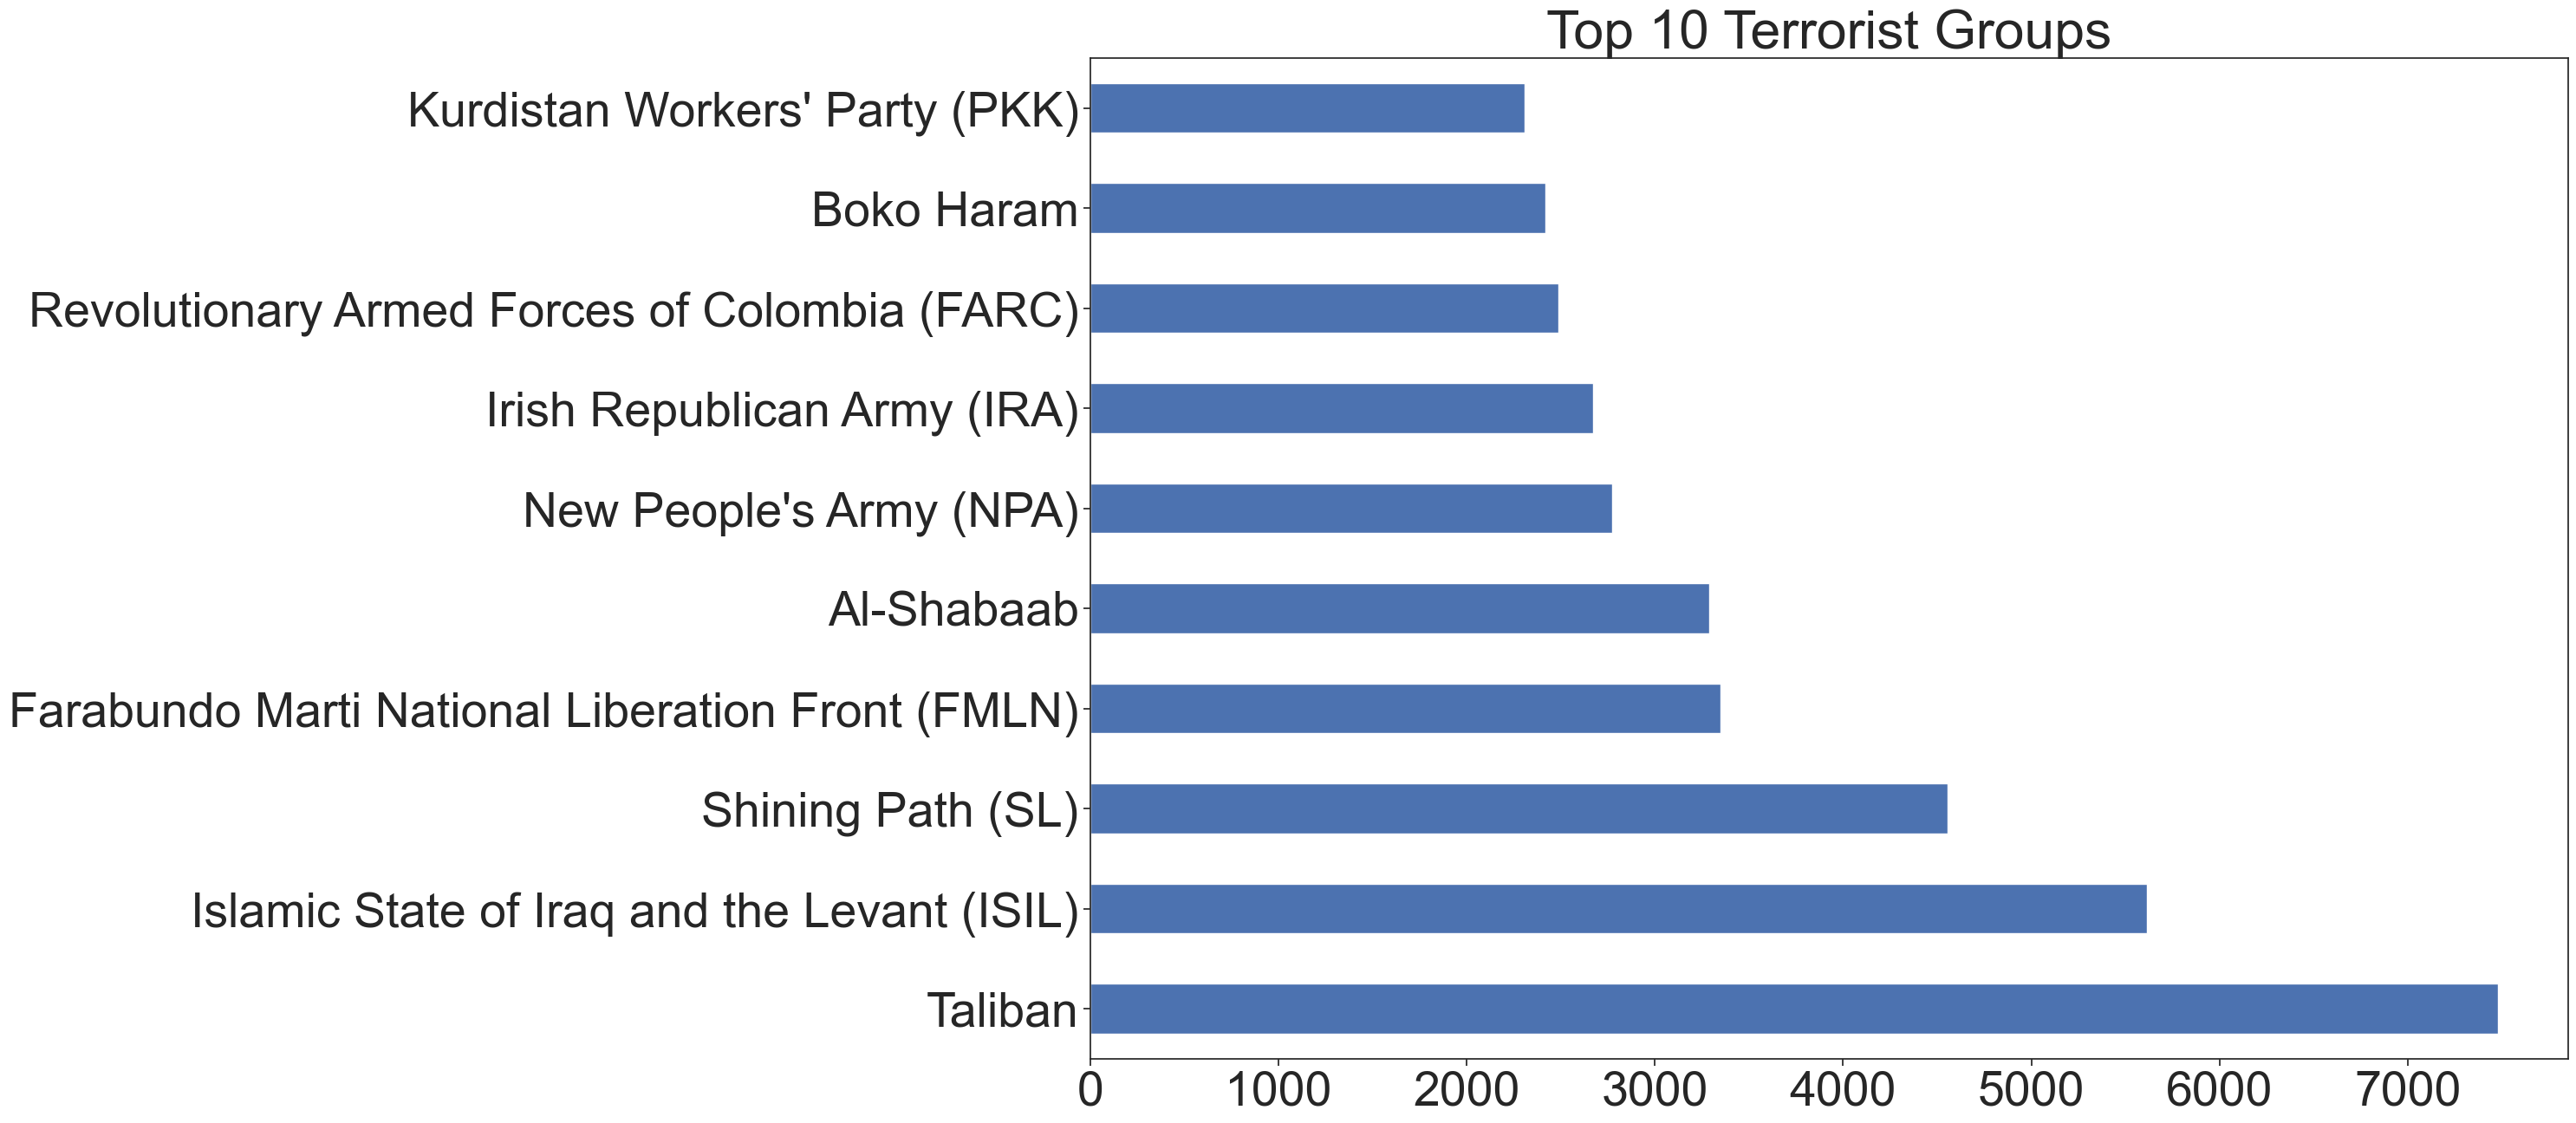

In [125]:
at= df['GroupName'].value_counts().drop('Unknown')[:10]
at.plot.barh(figsize=(22,15))
plt.yticks(fontsize=40)
plt.title('Top 10 Terrorist Groups', fontsize=45)
plt.xticks(fontsize=40)

In [126]:
## Type of Weapon
df['WeaponType'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

C:\Users\sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee')])

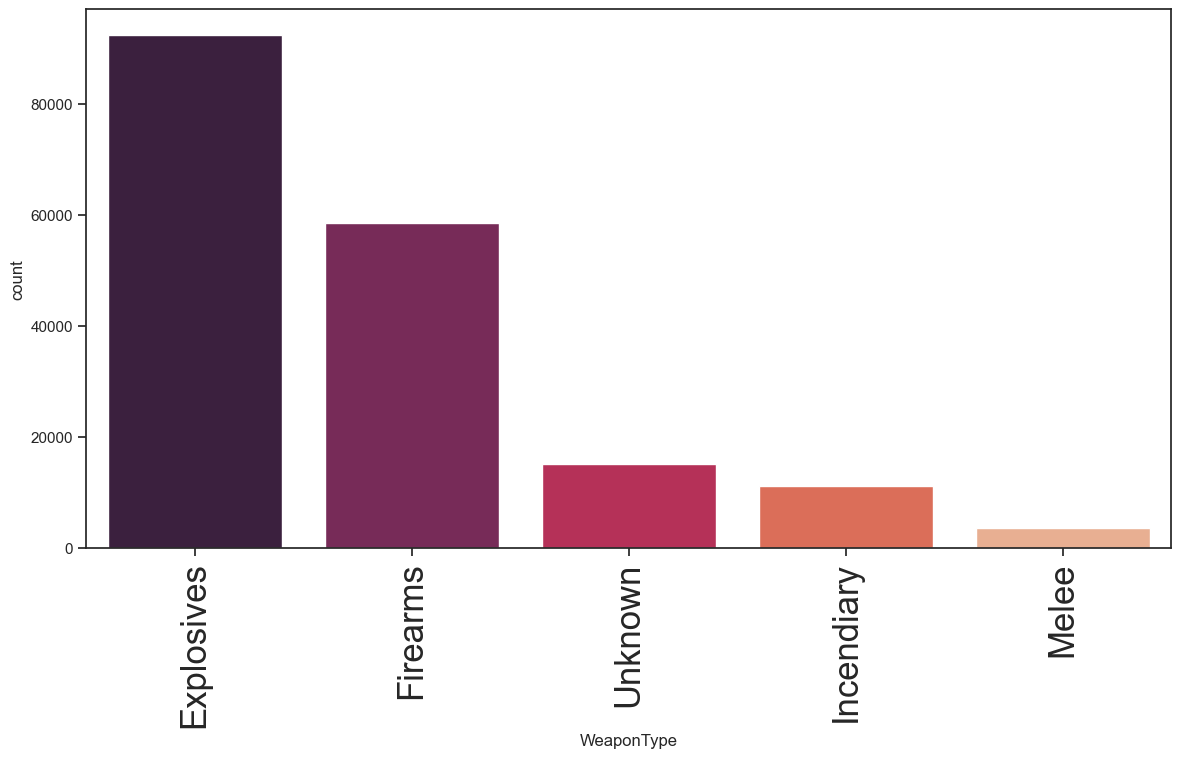

In [127]:
plt.figure(figsize=(14, 7))
sns.countplot(df['WeaponType'],  palette="rocket",
              order=df['WeaponType'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90, fontsize=25)

In [128]:
##Terrorist Activities in Iraq
Iraq = df[df['Country'] == 'Iraq']
Iraq.head()

,year,month,Country,Region,State,city,location,success,AttackType,TargetType,TargetSubType,Target,GroupName,motive,WeaponType,WeaponSubtype,Killed,Wounded,PropertyDamage
2854,1975,3,Iraq,Middle East & North Africa,Nineveh,Mosul,NaN,1,Hijacking,Airports & Aircraft,Aircraft (not at an airport),B-737,Unknown,NaN,Unknown,NaN,0.0,1.0,NaN
4385,1976,12,Iraq,Middle East & North Africa,Baghdad,Baghdad,NaN,1,Bombing/Explosion,Airports & Aircraft,Airport,Airport terminal,Unknown,NaN,Explosives,Dynamite/TNT,10.0,285.0,NaN
4393,1976,12,Iraq,Middle East & North Africa,Unknown,Penjwon,NaN,1,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",agricultural experts in NE Iraq,Kurdish Democratic Party-Iraq (KDP),NaN,Unknown,NaN,0.0,0.0,NaN
4402,1976,12,Iraq,Middle East & North Africa,Baghdad,Baghdad,NaN,1,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Personnel,Unknown,NaN,Firearms,Automatic or Semi-Automatic Rifle,2.0,0.0,NaN
8688,1979,6,Iraq,Middle East & North Africa,Basra,Basra,NaN,1,Assassination,Government (General),Politician or Political Party Movement/Meeting...,local secretary,Unknown,NaN,Unknown,NaN,1.0,0.0,NaN


<AxesSubplot:xlabel='year', ylabel='Killed'>

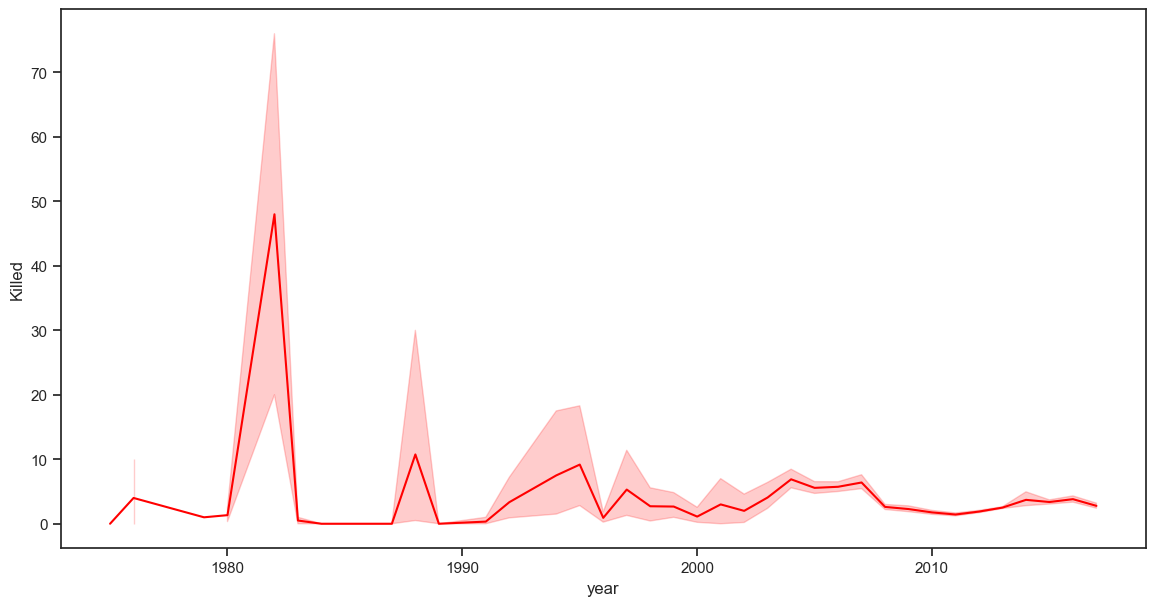

In [129]:
plt.figure(figsize=(14, 7))
sns.lineplot(data = Iraq, x = 'year', y = 'Killed', color = 'red')

In [130]:
print('Number of successful attacks: ',df['success'].sum())

Number of successful attacks:  161632


In [131]:
# Regions of Middle East and North Africa are most prone to terrorism.
# The most targeted areas were Private citizens and property.
# There has been a continuous increase in terrorism from 1970, the maximum being in the year 2014.
# Bombing and Explosion caused the most number of wounded people and killings.
# Taliban, ISIL,SL are the most active terrorist groups.
# Iraq is the country with high terrorism activities.